In [1]:
import sys
sys.path.append('..')
import ImpedanceSynthesiser as imps
import numpy as np
import matplotlib.pyplot as pl
%matplotlib notebook

reload(imps)

<module 'ImpedanceSynthesiser' from '../ImpedanceSynthesiser.pyc'>

<IPython.core.display.Javascript object>


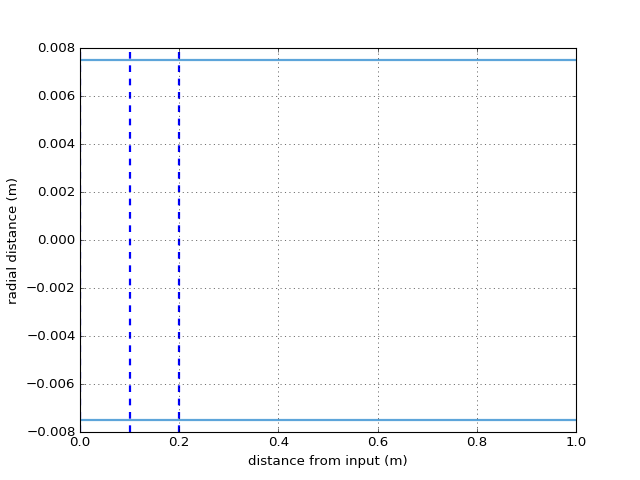

In [2]:
world = imps.AcousticWorld()

l0 = 1.0
lmid=.2

rad0 = .0075
rad_mid = .01

loss=True

mic_positions = [0,0.1,0.2]


duct = imps.Duct(world=world,losses=loss)
duct.set_termination(imps.PerfectAnechoicEnd())
duct.append_element(imps.StraightDuct(length=(l0),radius=rad0))
#duct.append_element(imps.StraightDuct(length=(l0-lmid)/2,radius=rad0))
#duct.append_element(imps.StraightDuct(length=lmid,radius=rad_mid))
#duct.append_element(imps.StraightDuct(length=(l0-lmid)/2,radius=rad0))

duct.plot_geometry()

for pos in mic_positions:
    pl.axvline(pos, ls='--')

<IPython.core.display.Javascript object>


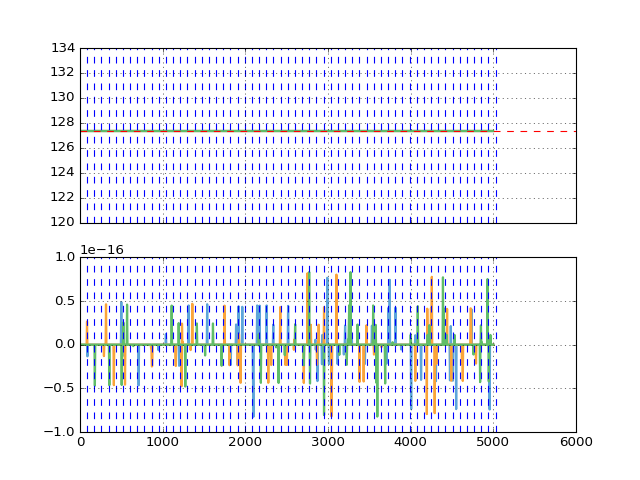

In [3]:
fvec = np.linspace(10,5000,1000)

fig,ax=pl.subplots(2,sharex=True)


for pos in mic_positions:
    z=[]
    for f in fvec:
        z.append(duct.get_input_impedance_at_freq(f,from_pos=pos))
    
    ax[0].plot(fvec,20*np.log10(np.abs(z)))
    ax[1].plot(fvec,np.angle(z))

ax[0].axhline(20*np.log10(np.abs(duct.elements[0].get_characteristic_impedance())),
              lw=1,ls='--',color='r')

f=0
c=duct.speed_of_sound
while f < max(fvec):
    f+=c/(4*l0)
    ax[0].axvline(f,ls='--',lw=1)
    ax[1].axvline(f,ls='--',lw=1)

In [4]:
## Get pressure ratios at microphones 

In [5]:
fvec = np.linspace(10,5000,1000)


z0=[]
z1=[]
z2=[]
for f in fvec:
    z0.append(duct.get_input_impedance_at_freq(f,from_pos=mic_positions[0]))
    z1.append(duct.get_input_impedance_at_freq(f,from_pos=mic_positions[1]))
    z2.append(duct.get_input_impedance_at_freq(f,from_pos=mic_positions[2]))

    
z0=np.array(z0)
z1=np.array(z1)
z2=np.array(z2)

We'll impose the flow $u$ and calculate the corresponding pressure $p$

<IPython.core.display.Javascript object>


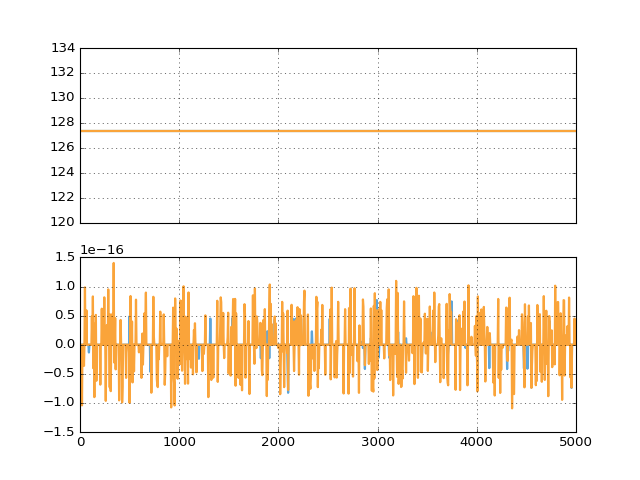

<IPython.core.display.Javascript object>


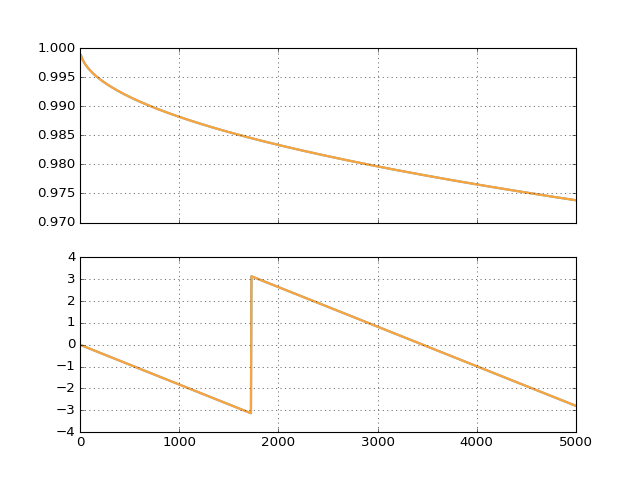

In [6]:
u0 = np.random.rand(len(fvec))-0.5 + 1j*(np.random.rand(len(fvec))-.5)

p0 = z0*u0

p1=np.zeros(len(fvec),dtype='complex128')
u1=np.zeros(len(fvec),dtype='complex128')
p2=np.zeros(len(fvec),dtype='complex128')
u2=np.zeros(len(fvec),dtype='complex128')

tmx1_arr = []

for ii,f in enumerate(fvec):
    tmx1 = duct.transfer_mx_at_freq(freq=f, 
                                     from_pos=mic_positions[0], 
                                     to_pos=mic_positions[1])
    tmx1_arr.append(tmx1)
    v1 = np.dot(tmx1,[p0[ii],u0[ii]])
    p1[ii] = v1[0]
    u1[ii] = v1[1]
    tmx2 = duct.transfer_mx_at_freq(freq=f, 
                                     from_pos=mic_positions[0], 
                                     to_pos=mic_positions[2])
    v2 = np.dot(tmx2,[p0[ii],u0[ii]])
    p2[ii] = v2[0]
    u2[ii] = v2[1]

fig,ax=pl.subplots(2,sharex=True)
ax[0].plot(fvec,20*np.log10(np.abs(z0)))
ax[1].plot(fvec,np.angle(z0))

ax[0].plot(fvec,20*np.log10(np.abs(p0/u0)))
ax[1].plot(fvec,np.angle(p0/u0))

fig,ax=pl.subplots(2,sharex=True)

ax[0].plot(fvec,np.abs(p2/p1))
ax[0].plot(fvec,np.abs(u2/u1))
ax[1].plot(fvec,np.angle(p2/p1))
ax[1].plot(fvec,np.angle(u2/u1))


<IPython.core.display.Javascript object>


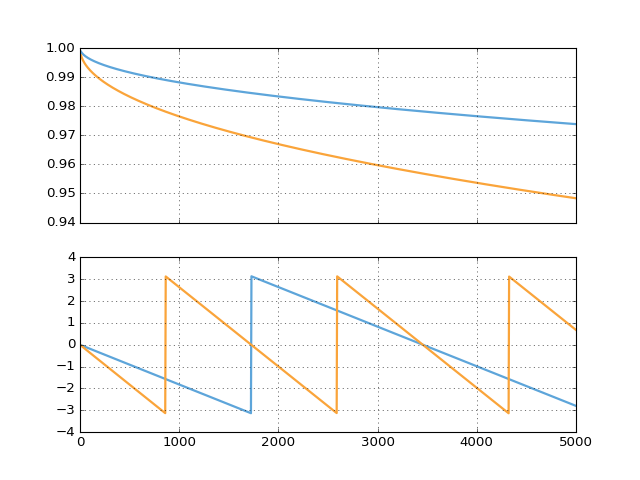

In [7]:
fig,ax=pl.subplots(2,sharex=True)

ax[0].plot(fvec,np.abs(p1/p0))
ax[0].plot(fvec,np.abs(p2/p0))
ax[1].plot(fvec,np.angle(p1/p0))
ax[1].plot(fvec,np.angle(p2/p0))


<IPython.core.display.Javascript object>


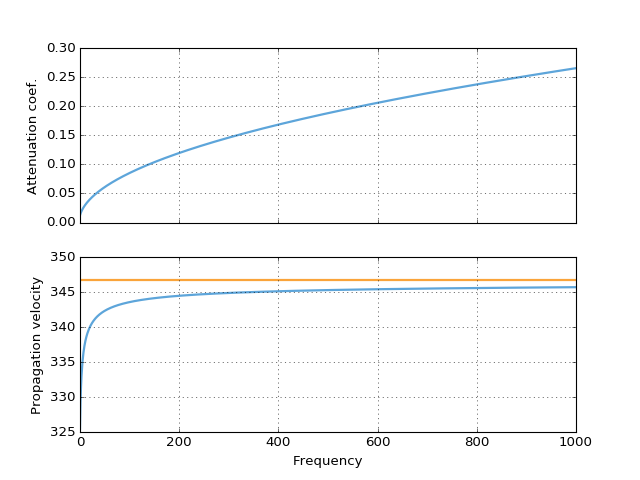

In [8]:
fig, ax = pl.subplots(2,sharex=True)
pc = []
for f in fvec:
    pc.append(duct.elements[0].get_propagation_coefficient(freq=f))
    
pc=np.array(pc)

ax[0].plot(np.real(1j*pc))
ax[0].set_ylabel('Attenuation coef.')
ax[1].plot(1./np.imag(1j*pc/2/np.pi/fvec))
ax[1].plot(duct.speed_of_sound*np.ones(len(fvec)))
ax[1].set_ylabel('Propagation velocity')
ax[1].set_xlabel('Frequency')


<IPython.core.display.Javascript object>


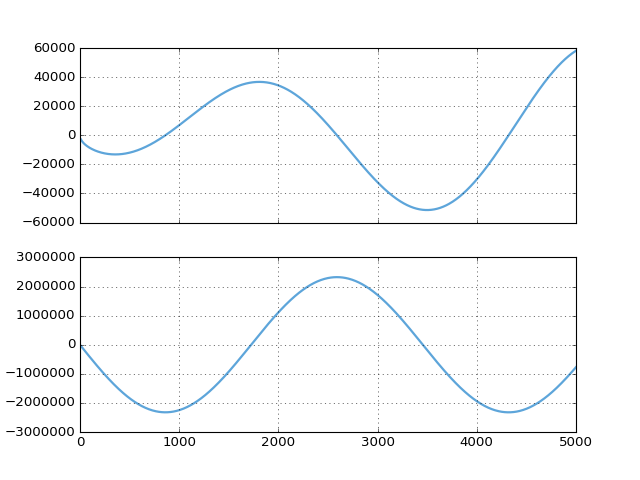

In [9]:
fig,ax=pl.subplots(2,sharex=True)
# for positive travelling wave, a=b=1
a=1
b=1
vec = a*np.array(tmx1_arr)[:,0,0]+b*np.array(tmx1_arr)[:,0,1]
ax[0].plot(fvec,np.real(vec))
ax[1].plot(fvec,np.imag(vec))
